# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from tqdm import tqdm_notebook

from utils import get_dataset

In [2]:
%matplotlib inline

In [3]:
dataset = get_dataset("./data/waymo/processed/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


In [4]:
it = dataset.as_numpy_iterator()
next(it)

{'image': array([[[ 40,  57,  49],
         [ 45,  62,  56],
         [ 52,  63,  67],
         ...,
         [122, 181, 249],
         [123, 182, 250],
         [120, 179, 247]],
 
        [[ 33,  50,  44],
         [ 45,  60,  57],
         [ 51,  62,  66],
         ...,
         [121, 180, 248],
         [123, 182, 250],
         [121, 180, 248]],
 
        [[ 34,  49,  46],
         [ 43,  57,  57],
         [ 48,  59,  63],
         ...,
         [123, 182, 250],
         [123, 182, 250],
         [120, 179, 247]],
 
        ...,
 
        [[ 72,  73,  78],
         [ 72,  73,  78],
         [ 73,  74,  79],
         ...,
         [ 62,  60,  63],
         [ 65,  63,  66],
         [ 61,  59,  62]],
 
        [[ 72,  73,  78],
         [ 72,  73,  78],
         [ 72,  73,  78],
         ...,
         [ 68,  66,  69],
         [ 67,  67,  69],
         [ 68,  68,  70]],
 
        [[ 71,  72,  77],
         [ 71,  72,  77],
         [ 71,  72,  77],
         ...,
         [ 73,  71,

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [29]:
def display_instances(batch, row=2, col=5):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    
    gtdic = {}
    filenames = []
    images = []
    for gt in batch.as_numpy_iterator():
        filenames.append(gt['filename'])
        gtdic[gt['filename']] = gt
        images.append(gt['image'])

    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    width = images[0].shape[1]
    height = images[0].shape[0]
    
    f, ax = plt.subplots(row, col, figsize=(col*4, row*4))
    for i in range(len(filenames)):
        x = i // col
        y = i % col

        filename = filenames[i]
        img = images[i]
        try:
            ax[x, y].imshow(img)
        except:
            ax.imshow(img)

        bboxes = gtdic[filename]['groundtruth_boxes']
        classes = gtdic[filename]['groundtruth_classes']
        x = i // col
        for cl, bb in zip(classes, bboxes):
            y1, x1, y2, x2 = bb
            x1, x2 = x1 * width, x2 * width
            y1, y2 = y1 * width, y2 * width
            rec = patches.Rectangle((x1, y1), x2- x1, y2-y1, facecolor='none', 
                            edgecolor=colormap[cl])
            
            try:
                ax[x, y].add_patch(rec)
            except:
                ax.add_patch(rec)
                
        try:
            ax[x ,y].axis('off')
        except:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

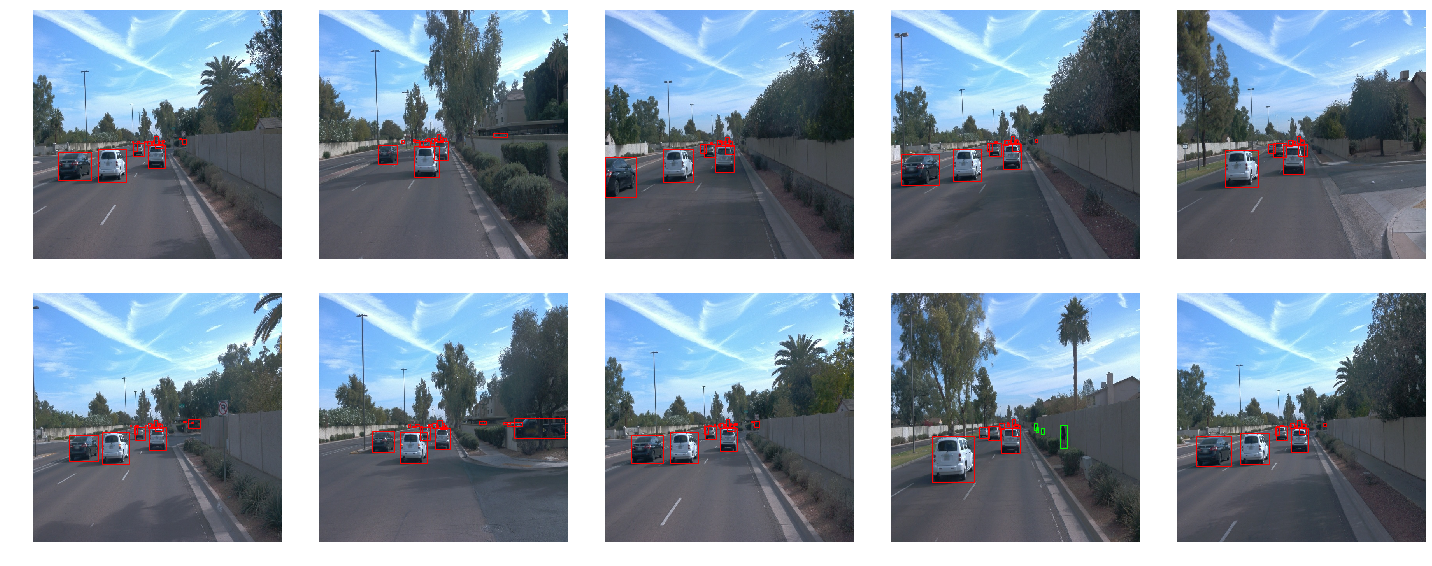

In [9]:
## STUDENT SOLUTION HERE
batch10 = dataset.shuffle(1).take(10)

display_instances(batch10)


## Class distribution

Here I am counting the appearance of each classes. As the total dataset is very large, we will only sample 100 image from a single file. Next I am visualizing probability distribution and information distribution from these samples.

In [10]:
# Count the number of appearance of classes
tf_records = os.listdir("./data/waymo/processed/")
c = Counter()
for tf_record in tqdm_notebook(tf_records):
    dataset = get_dataset(f"./data/waymo/processed/{tf_record}")
    for gt in dataset.shuffle(1).take(100).as_numpy_iterator():
        c.update(gt["groundtruth_classes"])

/tmp/ipykernel_1826/4154668542.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tf_record in tqdm_notebook(tf_records):


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11918003324473417938_1400_000_1420_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11918003324473417938_1400_000_1420_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11940460932056521663_1760_000_1780_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11940460932056521663_1760_000_1780_000_with_camera_labels.tf

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11119453952284076633_1369_940_1389_940_with_camera_labels.tfreco

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-1191788760630624072_3880_000_3900_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-1191788760630624072_3880_000_3900_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10498013744573185290_1240_000_1260_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10498013744573185290_1240_000_1260_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11718898130355901268_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11718898130355901268_2300_000_2320_000_with_camera_labels.tfre

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10734565072045778791_440_000_460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10734565072045778791_440_000_460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-1208303279778032257_1360_000_1380_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11928449532664718059_1200_000_1220_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11928449532664718059_1200_000_1220_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10876852935525353526_1640_000_1660_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10876852935525353526_1640_000_1660_000_with_camera_labels.tf

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tf

In [11]:
print(c)

Counter({1: 178086, 2: 52859, 4: 1351})


In [14]:
# calculating probabilities, and negative log probability (Information)
keys = np.array(list(c.keys()))
values = np.array(list(c.values()))
prob = values / values.sum()
information = -np.log(prob)

In [15]:
print(prob)
print(information)

[0.76663395 0.22755019 0.00581586]
[0.26574584 1.48038443 5.14716736]


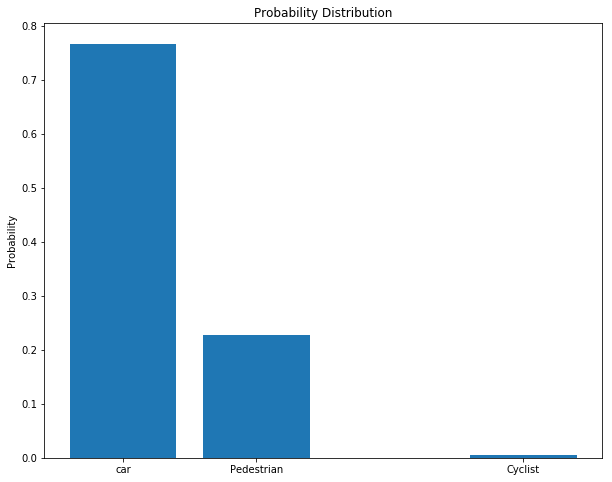

In [24]:
plt.figure(figsize=(10,8))
plt.bar(keys, prob)
plt.title("Probability Distribution")
plt.xticks([1, 2, 4], ["car", "Pedestrian", "Cyclist"])
plt.ylabel("Probability")
plt.show()

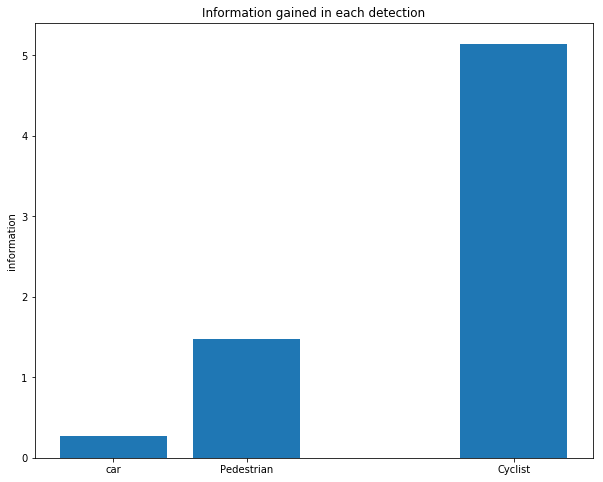

In [25]:
plt.figure(figsize=(10,8))
plt.bar(keys, information)
plt.title("Information gained in each detection")
plt.xticks([1, 2, 4], ["car", "Pedestrian", "Cyclist"])
plt.ylabel("information")
plt.show()

## Images

The image samples below shows various light and weather conditions. The roads also vary from busy city roads, country roads, highway roads

/tmp/ipykernel_1826/948036205.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tf_record in tqdm_notebook(tf_records[::4]):


  0%|          | 0/25 [00:00<?, ?it/s]

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-12179768245749640056_5561_070_5581_070_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


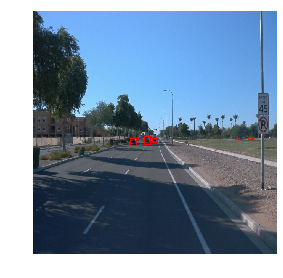

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10724020115992582208_7660_400_7680_400_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


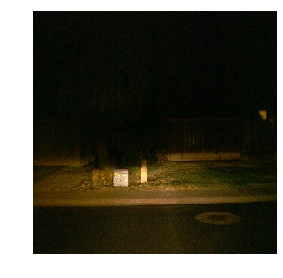

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


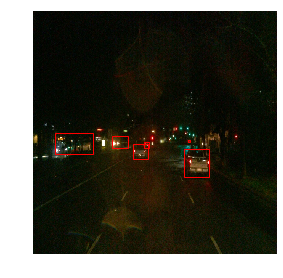

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10584247114982259878_490_000_510_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


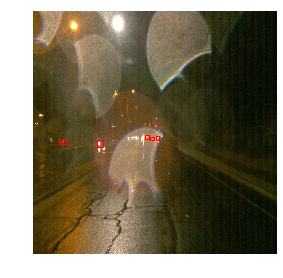

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10964956617027590844_1584_680_1604_680_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10964956617027590844_1584_680_1604_680_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


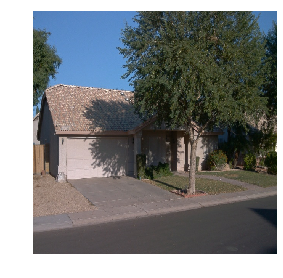

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


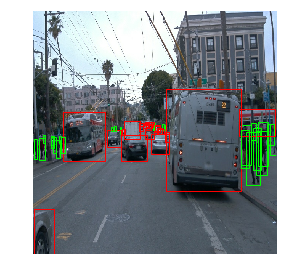

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11076364019363412893_1711_000_1731_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11076364019363412893_1711_000_1731_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


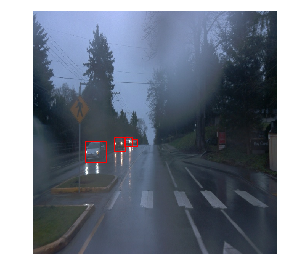

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


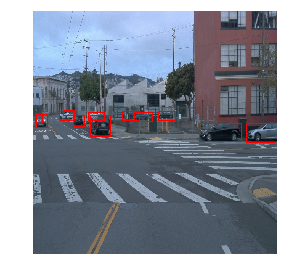

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10231929575853664160_1160_000_1180_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10231929575853664160_1160_000_1180_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


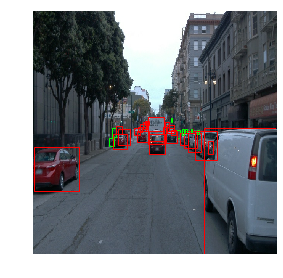

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11392401368700458296_1086_429_1106_429_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11392401368700458296_1086_429_1106_429_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


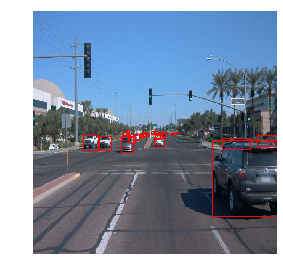

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11718898130355901268_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11718898130355901268_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


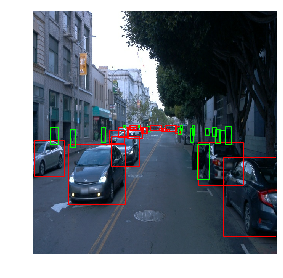

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11252086830380107152_1540_000_1560_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


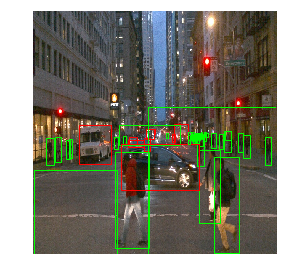

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10723911392655396041_860_000_880_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10723911392655396041_860_000_880_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


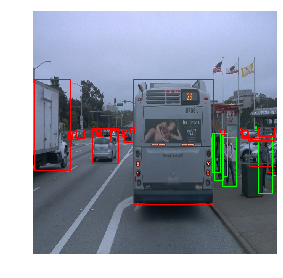

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


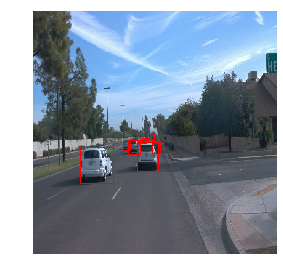

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10588771936253546636_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10588771936253546636_2300_000_2320_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


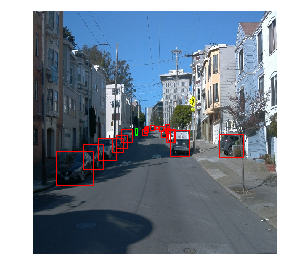

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11379226583756500423_6230_810_6250_810_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11379226583756500423_6230_810_6250_810_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


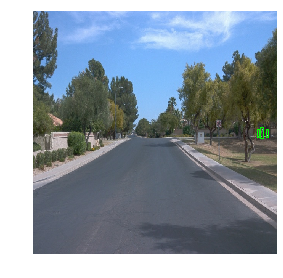

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10596949720463106554_1933_530_1953_530_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10596949720463106554_1933_530_1953_530_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


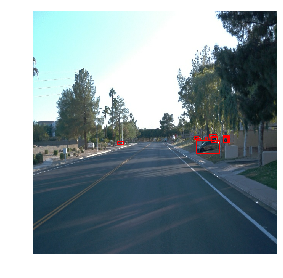

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11799592541704458019_9828_750_9848_750_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11799592541704458019_9828_750_9848_750_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


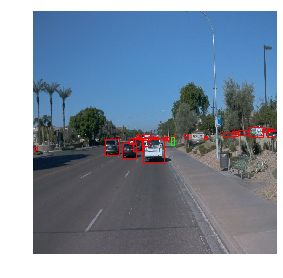

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11355519273066561009_5323_000_5343_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11355519273066561009_5323_000_5343_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


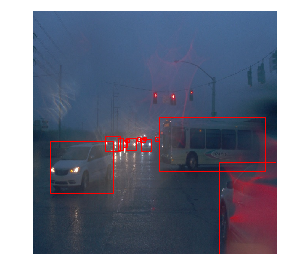

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11113047206980595400_2560_000_2580_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


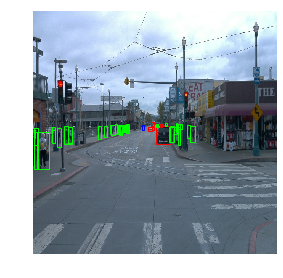

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10226164909075980558_180_000_200_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


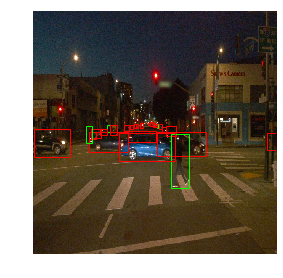

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


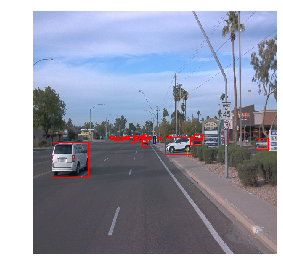

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


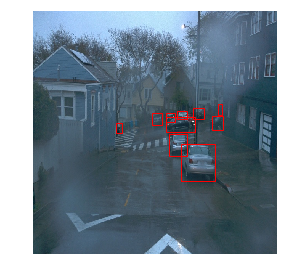

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-11318901554551149504_520_000_540_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-11318901554551149504_520_000_540_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


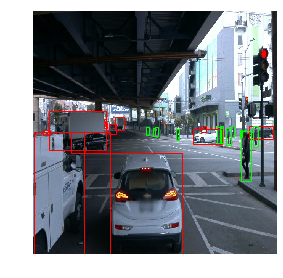

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/processed/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/processed/segment-10327752107000040525_1120_000_1140_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


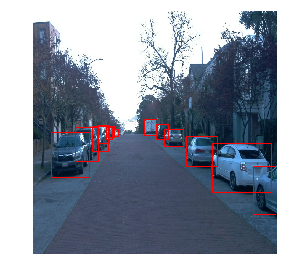

In [31]:
tf_records = os.listdir("./data/waymo/processed/")
c = Counter()
for tf_record in tqdm_notebook(tf_records[::4]):
    dataset = get_dataset(f"./data/waymo/processed/{tf_record}")
    batch9 = dataset.shuffle(1).take(1)
    display_instances(batch9, row=1, col=1)